# Building Decisoon Tree classifier to predict purchase behavior using Bank Marketing dataset:

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Set visualization style
sns.set(style="whitegrid")

In [ ]:
bank=pd.read_csv('Bank.csv', sep = ";")

bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Understanding the dataset:

In [ ]:
#checkin structure
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [22]:
#Summary statistics
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [23]:
#checking for missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Preprocessing:
Convert categorical columns into numeric format using one-hot encoding or label encoding.  
Split the data into features (X) and target (y).  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns using LabelEncoder
categorical_columns = bank.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_columns:
    bank[col] = encoder.fit_transform(bank[col])

# Define features (X) and target (y)
X = bank.drop(columns=["y"])  # Replace 'y' with the target column
y = bank["y"]

# Check transformed data
print(X.head())
print(y.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0   19     10        79         1     -1         0         3  
1   11      8       220         1    339         4         0  
2   16      0       185         1    330         1         0  
3    3      6       199         4     -1         0         3  
4    5      8       226         1     -1         0         3  
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


#### Split the Dataset
Split the data into 70% training and 30% testing sets.

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")

Training set size: 3164, Testing set size: 1357


#### Build the Decision Tree Classifier:
Use DecisionTreeClassifier from sklearn to build the model.

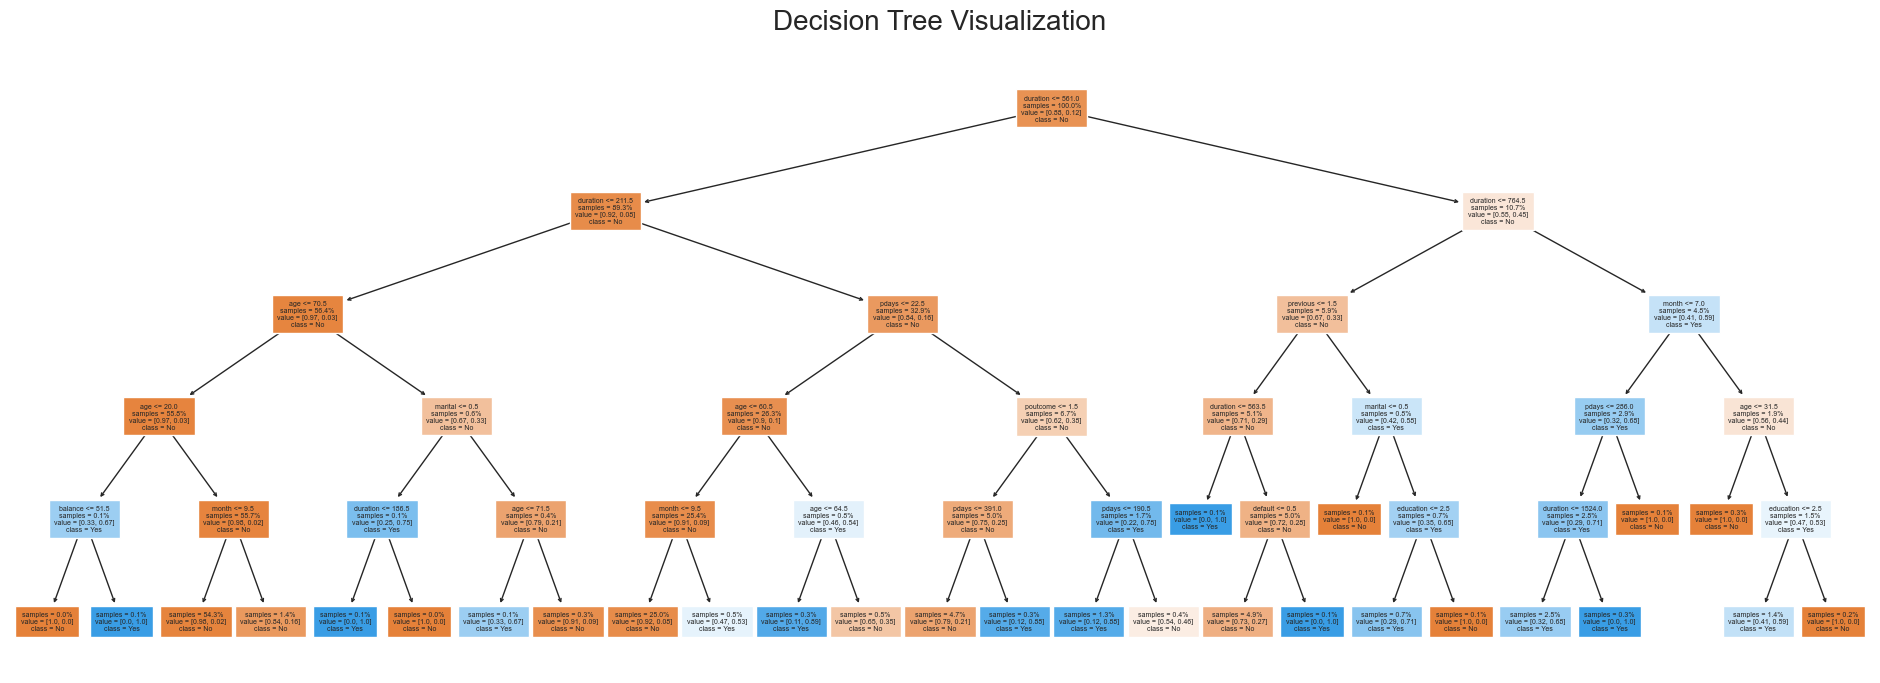

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Visualize the Decision Tree
import matplotlib.pyplot as plt

# Create a larger figure to give more space to the tree
plt.figure(figsize=(24, 8))  # Increase width and height for better spacing

# Visualize the decision tree
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    fontsize=5,  # Adjust font size for better clarity
    proportion=True,  # Adjust node size proportional to the number of samples
    impurity=False,  # Remove impurity information to reduce clutter
    precision=2  # Limit the precision of numbers in the visualization
)

# Add a title to the plot
plt.title("Decision Tree Visualization", fontsize=20, pad=20)

# Display the tree
plt.show()

### Understanding Decision Trees:

Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They work by creating a tree-like 1  model of decisions and their possible consequences. Each internal node represents a test on an attribute, each branch represents the outcome of the test, and each 2  leaf node represents a class label 3  or a predicted value.

#### Interpreting the Decision Tree Visualization:

**Overall Structure:**  
The tree starts with a root node, which is the first decision point.
The root node splits into branches based on the outcome of the test on the attribute.
Each branch leads to another node, which again splits into branches, and so on.
The process continues until the tree reaches leaf nodes, which represent the final predictions or classifications.  

**Node Interpretation:**     
Each internal node (non-leaf) displays the attribute being tested and the threshold used for the split.
Leaf nodes show the predicted class label or the predicted value.  
    

**Root Node:** Tests a significant attribute like "Income" or "Age".  
**Internal Nodes:** Would test other relevant attributes like "Education", "Occupation", etc.  
**Leaf Nodes:** Would display the final classification or prediction, such as "Low Risk", "Medium Risk", "High Risk" for a credit risk model.

**Interpretation:**      

**Prediction:** To predict a new data point, start at the root node and follow the branch corresponding to the outcome of the test on the attribute.   Continue this process until you reach a leaf node, which gives the final prediction.    
**Feature Importance:** Attributes tested closer to the root are generally more important in the decision-making process.    
**Decision Boundaries:** The tree implicitly defines decision boundaries in the feature space.  

**Additional Considerations:**

**Tree Depth:** Deeper trees might overfit the training data.    
**Pruning:** Techniques like pruning can be used to reduce the complexity of the tree and prevent overfitting.    
**Ensemble Methods:** Decision trees can be combined into ensemble methods like Random Forest or Gradient Boosting for improved performance.    

###  Evaluate the Model
Evaluate the decision tree using metrics like accuracy, precision, recall, and F1 score.

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8909358879882093
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1205
           1       0.52      0.34      0.41       152

    accuracy                           0.89      1357
   macro avg       0.72      0.65      0.67      1357
weighted avg       0.88      0.89      0.88      1357

Confusion Matrix:
 [[1158   47]
 [ 101   51]]


**Accuracy:** 0.8909358879882093

This means that the model correctly predicted the class label for 89.09% of the instances in the test dataset.  
**Classification Report:**  

**Precision:**    

For class 0: 0.92 - This means that when the model predicts class 0, it is correct 92% of the time.
For class 1: 0.52 - This means that when the model predicts class 1, it is correct 52% of the time.  
**Recall:**    

For class 0: 0.96 - This means that the model correctly identifies 96% of the actual instances of class 0.
For class 1: 0.34 - This means that the model correctly identifies only 34% of the actual instances of class 1.   
**F1-score:**  

For class 0: 0.94 - This is the harmonic mean of precision and recall for class 0, providing a balanced measure of performance.
For class 1: 0.41 - This is the harmonic mean for class 1, indicating a lower balance between precision and recall.  
**Support:** 

Class 0 has 1205 instances in the test dataset.
Class 1 has 152 instances in the test dataset.
Accuracy: 0.89 - This is the overall accuracy of the model, which is the same as the accuracy reported earlier.  

**Macro Avg:** This calculates the average precision, recall, and F1-score across both classes, giving equal weight to each class.  

**Weighted Avg:** This calculates the average precision, recall, and F1-score across both classes, giving more weight to the class with more instances.  

**Confusion Matrix:**  

[[1158 47]
 [ 101 51]]
The first row represents the predicted class 0, and the second row represents the predicted class 1.
The first column represents the actual class 0, and the second column represents the actual class 1.
So, for example, the value 1158 in the top-left corner means that 1158 instances of class 0 were correctly predicted as class 0.

#### Make Predictions

In [30]:
# Example prediction
example_data = X_test.iloc[0]  # Replace with custom input if available
prediction = clf.predict([example_data])

print(f"Prediction for example data: {prediction}")


Prediction for example data: [0]


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
